In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
CSV_PATH = os.path.join("..", "data", "youtube_videos", "1", "train", "data.csv")

df = pd.read_csv(CSV_PATH)
df.head()

,IMG_PATH,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,LEFT_ELBOW_X,LEFT_ELBOW_Y,LEFT_WRIST_X,LEFT_WRIST_Y,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_ELBOW_X,RIGHT_ELBOW_Y,RIGHT_WRIST_X,RIGHT_WRIST_Y,LEFT_SHOULDER_ELBOW_DISTANCE,LEFT_SHOULDER_WRIST_DISTANCE,RIGHT_SHOULDER_ELBOW_DISTANCE,RIGHT_SHOULDER_WRIST_DISTANCE,LEFT_SHOULDER_WRIST_Y_DISTANCE,RIGHT_SHOULDER_WRIST_Y_DISTANCE,Label
0,.\data\youtube_videos\1\train\youtube-361_jpg....,0.224086,0.670140,0.318308,0.845190,0.236412,0.906362,0.224086,0.624485,0.313464,0.805097,0.243952,0.886570,0.198797,0.236544,0.191508,0.262151,0.236222,0.262086,0
1,.\data\youtube_videos\1\train\youtube-487_jpg....,0.534592,0.805214,0.539942,0.783723,0.522431,0.811453,0.534592,0.786360,0.404333,0.782561,0.351131,0.879505,0.022147,0.013669,0.048735,0.137974,0.006240,0.093145,0
2,.\data\youtube_videos\1\train\youtube-98_jpg.r...,0.669487,0.576469,0.588705,0.490411,0.595168,0.614546,0.669487,0.630825,0.475338,0.541033,0.463563,0.717061,0.118033,0.083505,0.154308,0.162108,0.038077,0.086236,0
3,.\data\youtube_videos\1\train\youtube-459_jpg....,0.592262,0.452519,0.619360,0.667519,0.640895,0.871654,0.592262,0.469718,0.393121,0.681099,0.360248,0.884170,0.216701,0.421947,0.214255,0.419969,0.419135,0.414452,1
4,.\data\youtube_videos\1\train\youtube-189_jpg....,0.219956,0.377259,0.233518,0.634823,0.233954,0.906356,0.219956,0.370751,0.262490,0.630275,0.260703,0.856350,0.257921,0.529282,0.259887,0.485746,0.529096,0.485599,1


# Distribution of labels

In the plot below, we can see a disproportion between 'down' and 'up' stage. It can affect training results.
We must consider using weights to calculate a loss function during training.

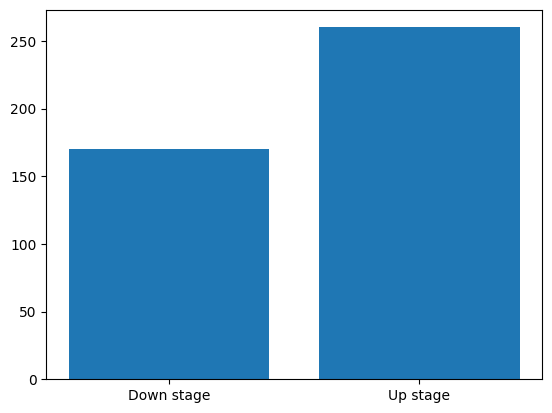

In [4]:
labels = df["Label"].value_counts().sort_index()
labels_index = labels.index
labels_values = labels.values

ax = plt.subplot()
ax.bar(labels_index, labels_values);
ax.set_xticks(labels_index, ["Down stage", "Up stage"]);

# Data overview

The .csv file contains landmarks extracted from 430 different images. Some images were taken from different angles.
A majority of columns in the file are not necessary. Raw landmarks are not valuable to training. 
We should use only calculated distances but on the Y axis. 

In [5]:
df.describe()

,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,LEFT_ELBOW_X,LEFT_ELBOW_Y,LEFT_WRIST_X,LEFT_WRIST_Y,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_ELBOW_X,RIGHT_ELBOW_Y,RIGHT_WRIST_X,RIGHT_WRIST_Y,LEFT_SHOULDER_ELBOW_DISTANCE,LEFT_SHOULDER_WRIST_DISTANCE,RIGHT_SHOULDER_ELBOW_DISTANCE,RIGHT_SHOULDER_WRIST_DISTANCE,LEFT_SHOULDER_WRIST_Y_DISTANCE,RIGHT_SHOULDER_WRIST_Y_DISTANCE,Label
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,0.367360,0.574420,0.448998,0.670851,0.457681,0.879459,0.367360,0.562277,0.339234,0.668466,0.332237,0.851820,0.187736,0.334011,0.167256,0.310890,0.306468,0.290919,0.604651
std,0.157528,0.165576,0.147002,0.078319,0.150941,0.058691,0.157528,0.151868,0.055974,0.073155,0.062959,0.045916,0.064659,0.144571,0.060001,0.128604,0.159915,0.145490,0.489495
min,0.163716,0.098519,0.229351,0.255354,0.204117,0.548609,0.163716,0.137473,0.216147,0.393555,0.207075,0.653396,0.022147,0.013669,0.015194,0.045217,0.006240,0.043457,0.000000
25%,0.235222,0.453589,0.305004,0.669494,0.312971,0.874197,0.235222,0.453776,0.308142,0.639371,0.312040,0.838869,0.152037,0.205196,0.138520,0.193624,0.154773,0.142866,0.000000
50%,0.305673,0.545808,0.433928,0.681694,0.439228,0.899806,0.305673,0.531240,0.329856,0.672307,0.329971,0.855144,0.191061,0.352974,0.173367,0.341046,0.330882,0.326919,1.000000
75%,0.545159,0.727678,0.598419,0.692793,0.604927,0.906442,0.545159,0.699482,0.374389,0.696460,0.355239,0.887886,0.227038,0.432811,0.212126,0.420638,0.427412,0.415896,1.000000
max,0.720641,0.862165,0.734904,0.898817,0.707452,0.937691,0.720641,0.854873,0.521637,0.856886,0.528463,0.955606,0.432616,0.777495,0.346335,0.643291,0.761643,0.638786,1.000000


In [6]:
down_stage_df = df[df["Label"] == 0]
up_stage_df = df[df["Label"] == 1]

In [8]:
# Down stage
down_y_distances = down_stage_df[["LEFT_SHOULDER_WRIST_Y_DISTANCE", "RIGHT_SHOULDER_WRIST_Y_DISTANCE"]]
down_y_distances.describe()

,LEFT_SHOULDER_WRIST_Y_DISTANCE,RIGHT_SHOULDER_WRIST_Y_DISTANCE
count,170.000000,170.000000
mean,0.286352,0.276969
std,0.156109,0.143604
min,0.006240,0.043848
25%,0.133298,0.128542
50%,0.320682,0.321034
75%,0.416293,0.407364
max,0.718573,0.632515


In [9]:
# Up stage
up_y_distances = up_stage_df[["LEFT_SHOULDER_WRIST_Y_DISTANCE", "RIGHT_SHOULDER_WRIST_Y_DISTANCE"]]
up_y_distances.describe()

,LEFT_SHOULDER_WRIST_Y_DISTANCE,RIGHT_SHOULDER_WRIST_Y_DISTANCE
count,260.000000,260.000000
mean,0.319621,0.300039
std,0.161298,0.146265
min,0.028674,0.043457
25%,0.176042,0.159654
50%,0.340639,0.328101
75%,0.436637,0.418289
max,0.761643,0.638786


In [10]:
def normalize(x: float) -> float:
    """
    The function normalizes passed number to range [-1; 1].
    
    Arguments:
        x (float) - A variable to normalize.
        
    Returns:
        normalized (float) - A normalized number.
    """
    distance_min = 0.006240
    distance_max = 0.761643
    
    return (x-distance_min) / (distance_max - distance_min)

In [13]:
df["LEFT_SHOULDER_WRIST_Y_DISTANCE_NORMALIZED"] = df["LEFT_SHOULDER_WRIST_Y_DISTANCE"].apply(normalize)
df["RIGHT_SHOULDER_WRIST_Y_DISTANCE_NORMALIZED"] = df["RIGHT_SHOULDER_WRIST_Y_DISTANCE"].apply(normalize)

In [14]:
df.to_csv("normalized_data.csv", index=False)